<a href="https://colab.research.google.com/github/Putraarfiyansya/UAS-KECERDASAN-KOMPUTASIONAL/blob/main/CNN_(_Klasifikasi_Berita_Hoaks).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [9]:
import pandas as pd

data = {
    'judul': [
        "Vaksin COVID-19 menyebabkan magnet di tubuh",
        "Ilmuwan NASA temukan kehidupan di Mars",
        "5G adalah penyebab utama COVID-19",
        "Pemerintah resmi umumkan libur nasional",
        "Makan mie instan bikin otak beku permanen",
        "Peneliti Indonesia temukan vaksin kanker",
        "Minum air dingin setelah makan sebabkan kematian",
        "Presiden umumkan bantuan langsung tunai",
        "Orang meninggal hidup lagi setelah divaksin",
        "BMKG: Hujan meteor diprediksi di Jakarta"
    ],
    'label': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
}

df = pd.DataFrame(data)
print(df)


                                              judul  label
0       Vaksin COVID-19 menyebabkan magnet di tubuh      1
1            Ilmuwan NASA temukan kehidupan di Mars      0
2                 5G adalah penyebab utama COVID-19      1
3           Pemerintah resmi umumkan libur nasional      0
4         Makan mie instan bikin otak beku permanen      1
5          Peneliti Indonesia temukan vaksin kanker      0
6  Minum air dingin setelah makan sebabkan kematian      1
7           Presiden umumkan bantuan langsung tunai      0
8       Orang meninggal hidup lagi setelah divaksin      1
9          BMKG: Hujan meteor diprediksi di Jakarta      0


In [10]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # hapus simbol dan angka
    return text

df['judul_clean'] = df['judul'].apply(clean_text)

In [11]:
max_words = 1000
max_len = 20

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(df['judul_clean'])
sequences = tokenizer.texts_to_sequences(df['judul_clean'])
padded = pad_sequences(sequences, maxlen=max_len, padding='post')

X = padded
y = np.array(df['label'])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = Sequential([
    Embedding(input_dim=max_words, output_dim=32, input_length=max_len),
    Conv1D(64, kernel_size=3, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')  # untuk klasifikasi biner
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.6250 - loss: 0.6915 - val_accuracy: 0.5000 - val_loss: 0.6895
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7500 - loss: 0.6831 - val_accuracy: 0.5000 - val_loss: 0.6889
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.7500 - loss: 0.6860 - val_accuracy: 0.5000 - val_loss: 0.6890
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7500 - loss: 0.6837 - val_accuracy: 1.0000 - val_loss: 0.6888
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.6250 - loss: 0.6876 - val_accuracy: 1.0000 - val_loss: 0.6887
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.6250 - loss: 0.6852 - val_accuracy: 1.0000 - val_loss: 0.6886
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.8750 - loss: 0.6742 - val_accuracy: 1.0000 - val_loss: 0.6882
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.7500 - loss: 0.6770 - val_accuracy: 1.0000 - val_loss: 0.687

In [15]:
y_pred = model.predict(X_test)
y_pred_label = (y_pred > 0.5).astype(int)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_label))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



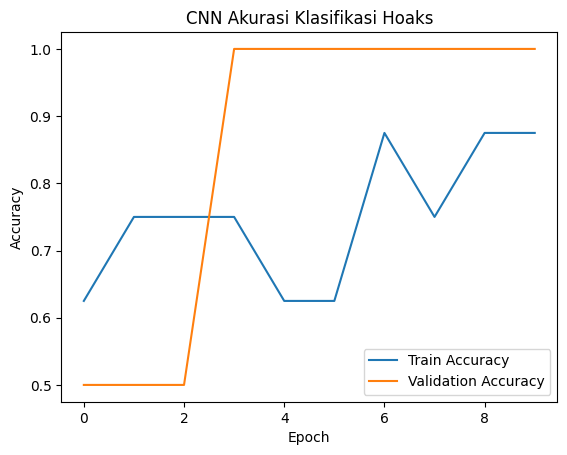

In [16]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Akurasi Klasifikasi Hoaks')
plt.show()